In [1]:
from os import getcwd
from os.path import join

import matplotlib.pyplot as plt
from processor import analysis, reports
import pandas as pd

rs = reports.ReportHandler.fetch_reports(join(getcwd(), 'batch-test-reports', '1-1500KB'))
ip, obs_set = reports.ReportHandler.collect_observations(rs)
obs_list = sorted(list(obs_set), key=lambda obs: getattr(obs, 'day_timestamp'))

obs_list = obs_list[:reports.ReportHandler.MINIMUM_OBSERVATIONS_QTY]
histogram_sorting_key_function = analysis.observation_rtt_key_function
rtt_histogram = analysis.generate_histogram(obs_list, histogram_sorting_key_function)
bin_info_df = pd.DataFrame([{'min_rtt': min_rtt, 'max_rtt': max_rtt, 'bin_width': bin_width} 
                            for bin_width, max_rtt, min_rtt in 
                            [analysis.bin_info(hbin, histogram_sorting_key_function) 
                             for hbin in rtt_histogram]])

<IPython.core.display.Javascript object>


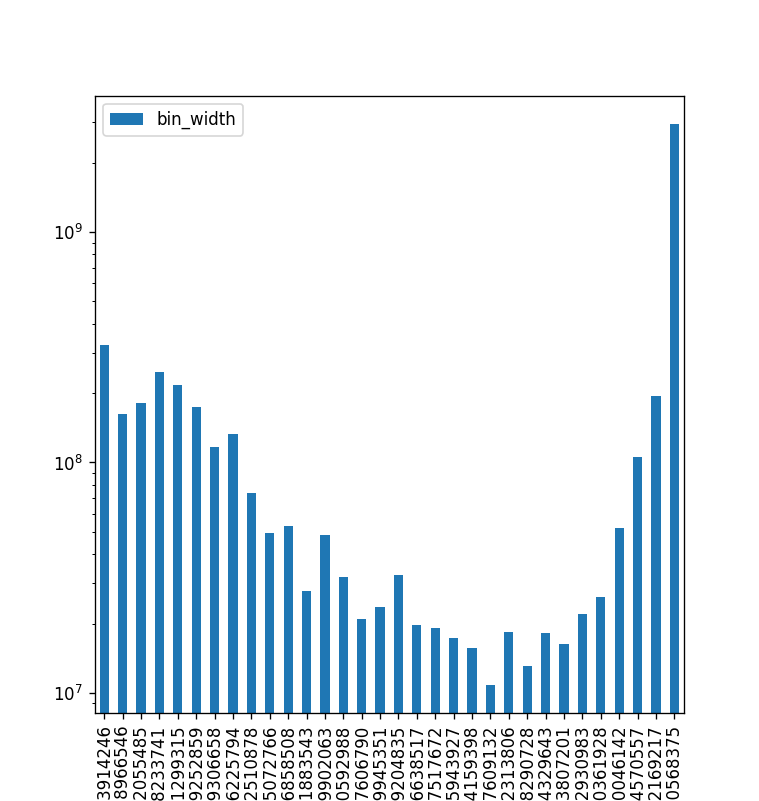

In [23]:
mid_rtt_df = (((bin_info_df['max_rtt'] - bin_info_df['min_rtt']) // 2) + bin_info_df['min_rtt']).rename('mid_rtt')
bin_width_mid_rtt_df = pd.concat([bin_info_df['bin_width'], mid_rtt_df], axis=1)
bin_width_mid_rtt_df.plot.bar('mid_rtt', 'bin_width', logy=True)

<IPython.core.display.Javascript object>


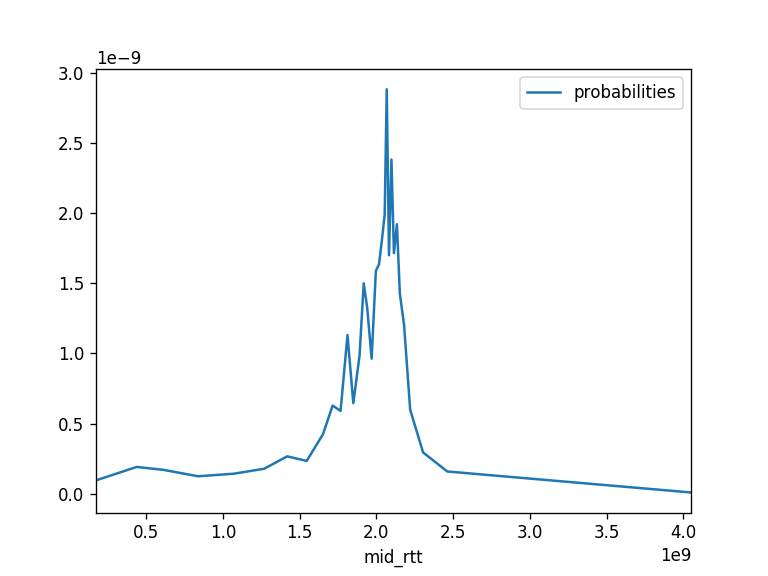

In [21]:
probabilities_df = pd.DataFrame(analysis.get_bins_probabilities(rtt_histogram, histogram_sorting_key_function), 
                                columns=['probabilities'])
df = pd.concat([probabilities_df, mid_rtt_df], axis=1)
df.plot('mid_rtt', 'probabilities')